In [ ]:
import re
import pandas as pd

In [2]:
f = open('Whatsapp Chat with Divya.txt','r',encoding='utf-8')

In [3]:
data = f.read()

In [ ]:
print(data)

In [5]:
pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'

In [ ]:
messages = re.split(pattern, data)[1:]
print(messages)

In [9]:
dates = re.findall(pattern,data)
dates

['10/30/18, 12:25 - ',
 '10/30/18, 13:58 - ',
 '11/1/18, 17:55 - ',
 '11/1/18, 18:07 - ',
 '11/1/18, 18:26 - ',
 '11/3/18, 11:08 - ',
 '11/3/18, 11:12 - ',
 '11/3/18, 11:12 - ',
 '11/3/18, 11:14 - ',
 '11/3/18, 11:14 - ',
 '11/3/18, 11:19 - ',
 '11/3/18, 11:31 - ',
 '11/3/18, 11:31 - ',
 '11/3/18, 11:35 - ',
 '11/3/18, 13:28 - ',
 '11/3/18, 13:28 - ',
 '11/3/18, 13:29 - ',
 '11/3/18, 13:42 - ',
 '11/3/18, 13:48 - ',
 '11/3/18, 16:47 - ',
 '11/3/18, 18:24 - ',
 '11/3/18, 18:36 - ',
 '11/3/18, 18:36 - ',
 '11/3/18, 18:39 - ',
 '11/3/18, 18:39 - ',
 '11/3/18, 18:39 - ',
 '11/3/18, 18:39 - ',
 '11/3/18, 18:39 - ',
 '11/3/18, 19:12 - ',
 '11/3/18, 19:12 - ',
 '11/7/18, 07:07 - ',
 '11/7/18, 08:35 - ',
 '11/7/18, 12:36 - ',
 '11/7/18, 12:40 - ',
 '11/17/18, 09:55 - ',
 '11/17/18, 12:46 - ',
 '12/12/18, 07:36 - ',
 '12/12/18, 07:58 - ',
 '12/12/18, 07:58 - ',
 '12/12/18, 07:59 - ',
 '12/12/18, 07:59 - ',
 '12/12/18, 07:59 - ',
 '12/12/18, 07:59 - ',
 '12/12/18, 08:00 - ',
 '1/1/19, 08:42 - ',

In [ ]:
df = pd.DataFrame({'user_message':messages,'message_date':dates})
# Convert message_date type
df['message_date'] = pd.to_datetime(df['message_date'], format='%m/%d/%y, %H:%M - ')
df.rename(columns={'message_date': 'date'},inplace=True)
df.head()

In [ ]:
# Seperate Users and Messages
users =[]
messages =[]
for message in df['user_message']:
    entry = re.split('([\w\W]+?):\s', message)
    if entry[1:]: #user name
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('group_notification')
        messages.append(entry[0])
        
df['user'] = users
df['message'] = messages
df.drop(columns=['user_message'],inplace =True)

df.head()

In [12]:
df['year'] = df['date'].dt.year

In [ ]:
df.head()

In [14]:
df['month'] = df['date'].dt.month_name()

In [15]:
df['day'] = df['date'].dt.day

In [16]:
df['hour'] = df['date'].dt.hour

In [17]:
df['minute'] = df['date'].dt.minute

In [ ]:
df.head()

In [19]:
df[df['user']== 'Akash Arya'].shape

(10117, 8)

In [20]:
words = []
for message in df['message']:
    words.extend(message.split())

In [21]:
len(words)

93087

In [22]:
pip install urlextract

Note: you may need to restart the kernel to use updated packages.


In [23]:
from urlextract import URLExtract
extractor = URLExtract()

In [24]:
links =[]
for message in df['message']:
    links.extend(extractor.find_urls(message))

In [25]:
len(links)

35

In [26]:
x = df['user'].value_counts().head()

In [27]:
import matplotlib.pyplot as plt

In [28]:
name = x.index
count = x.values

([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

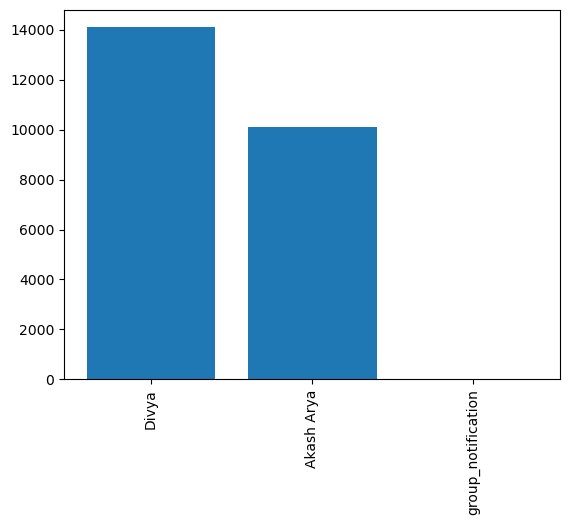

In [29]:
plt.bar(name,count)
plt.xticks(rotation='vertical')

In [30]:
df['user'].value_counts().head()

Divya                 14092
Akash Arya            10117
group_notification        2
Name: user, dtype: int64

In [31]:
round((df['user'].value_counts().head()/df.shape[0])*100).reset_index().rename(columns={'index':'name','user':'percent'})

,name,percent
0,Divya,58.0
1,Akash Arya,42.0
2,group_notification,0.0


In [32]:
words =[]
for message in df['message']:
    words.extend(message.split())

In [33]:
temp = df[df['user'] != 'group_notification']
temp = temp[temp['message'] != '<Media omitted>\n']

In [34]:
f = open('stopward.txt','r')
stop_words = f.read()
print(stop_words)

.
..
...
?
-
--
1
2
3
4
5
6
7
8
9
0
a
aadi
aaj
aap
aapne
aata
aati
aaya
aaye
ab
abbe
abbey
abe
abhi
able
about
above
accha
according
accordingly
acha
achcha
across
actually
after
afterwards
again
against
agar
ain
aint
ain't
aisa
aise
aisi
alag
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
andar
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
ap
apan
apart
apna
apnaa
apne
apni
appear
are
aren
arent
aren't
around
arre
as
aside
ask
asking
at
aur
avum
aya
aye
baad
baar
bad
bahut
bana
banae
banai
banao
banaya
banaye
banayi
banda
bande
bandi
bane
bani
bas
bata
batao
bc
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
below
beside
besides
best
better
between
beyond
bhai
bheetar
bhi
bhitar
bht
bilkul
bohot
bol
bola
bole
boli
bolo
bolta
bolte
bolti
both
brief
bro
btw
but
by
came
can
cannot
cant
can't
cause
causes
certain
certainly
chahiye
chaiye
chal
chalega
chhaiye
clearly
c'mon
com
come
comes
could
coul

In [35]:
words =[]
for message in temp['message']:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)
    words.extend(message.split())

In [36]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,hai,3553
1,to,1235
2,nai,1191
3,😂,1188
4,Lol,1122
5,bhi,970
6,Haa,864
7,I,854
8,nhi,792
9,🤣,724


In [37]:
# Remove Group Notification
# Remove Media omiited message
# remove stop words


In [38]:
!pip install emoji

     -------------------------------------- 240.9/240.9 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234912 sha256=629a9ae58a184ec5240a76034b2eeb4ff1a26c3b2ed1569a7fe9a0e15ef08c1c
  Stored in directory: c:\users\aakas\appdata\local\pip\cache\wheels\9a\b8\0f\f580817231cbf59f6ade9fd132ff60ada1de9f7dc85521f857
Successfully built emoji


In [45]:
import emoji

In [44]:
pip install emoji==1.6.3


     -------------------------------------- 174.2/174.2 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for emoji: filename=emoji-1.6.3-py3-none-any.whl size=170281 sha256=5aea52274c54ce6a9792d9f5f3cc8be5177b977189bd1e5b8cd1b4df75f9c089
  Stored in directory: c:\users\aakas\appdata\local\pip\cache\wheels\e5\c7\b3\b62b7809b5ea6d22241a713d9cc05741d7edaec674b9d61cb7
Successfully built emoji
  Attempting uninstall: emoji
    Found existing installation: emoji 1.7.0
    Uninstalling emoji-1.7.0:
      Successfully uninstalled emoji-1.7.0
Note: you may need to restart the kernel to use updated packages.


In [48]:
emojis = []
for message in df['message']:
    emojis.extend([c for c in message if c in emoji.EMOJI_DATA])

In [49]:
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

,0,1
0,🤣,3655
1,😂,1942
2,😝,1640
3,🏻,977
4,😘,614
...,...,...
148,😀,1
149,🫡,1
150,🙋,1
151,😇,1


In [50]:
df['month_num'] = df['date'].dt.month

In [54]:
timeline = df.groupby(['year','month_num','month']).count()['message'].reset_index()

In [55]:
time = []
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i] + "-" + str(timeline['year'][i]))

In [57]:
timeline['time'] = time

In [58]:
timeline

,year,month_num,month,message,time
0,2018,10,October,2,October-2018
1,2018,11,November,34,November-2018
2,2018,12,December,8,December-2018
3,2019,1,January,2,January-2019
4,2019,2,February,122,February-2019
5,2019,3,March,178,March-2019
6,2019,5,May,39,May-2019
7,2019,6,June,37,June-2019
8,2019,7,July,4,July-2019
9,2019,8,August,69,August-2019


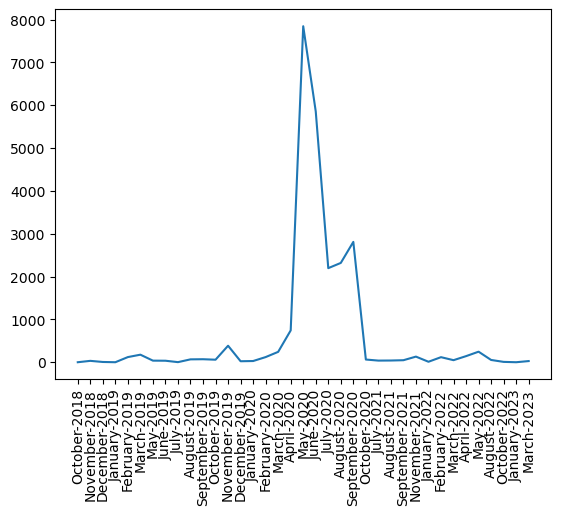

In [60]:
plt.plot(timeline['time'],timeline['message'])
plt.xticks(rotation="vertical")
plt.show()

In [61]:
df['day_name'] = df['date'].dt.day_name()

In [62]:
df['day_name'].value_counts()

Tuesday      4515
Sunday       4493
Thursday     3921
Wednesday    3524
Saturday     3267
Friday       2568
Monday       1923
Name: day_name, dtype: int64